# Lab 1 - Python, Pandas and Numpy
- **Author:** Qutub Khan Vajihi ([qutubkhan.vajihi@berkeley.edu](mailto:qutubkhan.vajihi@berkeley.edu)) (Adapted from labs by Dimitris Papadimitriou)
- **Date:** 27 January 2021
- **Course:** INFO 251: Applied Machine Learning

### Learning Objectives:

* Know what is good style when writing Python code
* Learn some useful Python features
* Work with DataFrames using the Pandas library
* Produce basic graphs using the Matplotlib library
* Understand numpy, matrix operations and iterations

## 1. Python Code Style
Guido van Rossum is one of the authors of the PEP8 style guide [PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/). Below are some references from this guide - 

"One of Guido's key insights is that code is read much more often than it is written. The guidelines provided here are intended to improve the readability of code and make it consistent across the wide spectrum of Python code. As PEP 20 says, "Readability counts"."

Below are a few points from this guide which we think are useful to note, but feel free to refer to the guide for much more detailed guidelines. 

* Line length:
    Maximum line length is 79 characters.

* Names: Make variable names (nouns) and function names (verbs) descriptive.

* Be consistent between ' and ".

* 1e6 or 10 ** 6 is more readable than 1000000.

* Whitespace: 
Always surround these binary operators with a single space on either side: assignment (=), augmented assignment (+=, -= etc.), comparisons (==, <, >, !=, <>, <=, >=, in, not in, is, is not), Booleans (and, or, not).

In [1]:
# Notice the whitespaces on either sides of operators
i = 0
submitted = 0
i = i + 1
submitted += 1
print(submitted)

1


* Avoid extraneous whitespaces immediately inside parentheses, brackets or braces.

In [2]:
# Correct:
ham = [0,1,2]
print(ham[0])

# Wrong:
print(ham[ 0 ])

0
0


* Blank lines:
Maintain two lines between all top-level things (functions, classes, imports, etc)

In [ ]:
def foo(x):
    if x >= 0:
        return math.sqrt(x)
    else:
        return None


def bar(x):
    if x < 0:
        return None
    return math.sqrt(x)

* Comments:
    For readability, try to always explain the functionality of your lines by commenting

In [ ]:
my_map = {'AML':0,'Lab':1}
inv_map = {v: k for k, v in my_map.items()} 
inv_map

* Imports - Should usually be on separate lines

In [3]:
# Correct:
import os
import sys

# Wrong:
import sys, os

# Correct:
from subprocess import Popen, PIPE

#### Rule of thumb-
- **Code is for people to read.**
- **Use your best judgment**


For more reference - https://towardsdatascience.com/an-overview-of-the-pep-8-style-guide-5672459c7682

## 2. Some Useful Python Features

* Use **with** to open files, which can ensure the files are closed.

In [ ]:
with open('test.txt', 'r') as f:
    for line in f:
        print(line)

In [ ]:
# Otherwise you explicitly need to 'open' and 'close' files.
f = open('test.txt', 'r')
for line in f:
    print(line)

f.close()

* Concatenate path parts with **os.path.join**

In [ ]:
import os
country_name = 'USA'
month = 'January'
path = os.path.join('a', 'b', country_name, month)
print(path)

In [ ]:
path = 'a/b/' + country_name + '/' + month
print(path)

* **enumerate** is great for getting index and elements of an iterator at the same time. 
    - It yields the elements of an iterator, as well as an index number.

In [ ]:
for i, x in enumerate([1, 2, 3]):
    print('Index:', i)
    print('Element:', x)

In [ ]:
# Otherwise this is the standard approach, using a Flag! 
flag = 0
for x in [1, 2, 3]:
    print('Index:', flag)
    print('Element:',x)
    flag += 1

* **lambda** - A Lambda Function is a small, anonymous function — anonymous in the sense that it doesn’t actually have a name.

In [ ]:
x = lambda a, b : a * b
print(x(5, 6)) # prints '30'

x = lambda a : a*3 + 3
print(x(3)) # prints '12'

* **zip** - The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc. If the passed iterators have different lengths, the iterator with the least items decides the length of the new iterator. (https://www.w3schools.com/python/ref_func_zip.asp)

In [4]:
products = ['table', 'chair', 'sofa', 'bed']
prices = [50, 20, 200, 150]

for product, price in zip(products, prices):
    print('Product: {}, Price: {}'.format(product, price))

Product: table, Price: 50
Product: chair, Price: 20
Product: sofa, Price: 200
Product: bed, Price: 150


## 3. Working with Data!

### 3.1 Pandas
pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.




#### Load the data

In [5]:
import pandas as pd
# loading a csv
auto_df = pd.read_csv('Auto.csv')

- mpg: miles per gallon
- cylinders: Number of cylinders between 4 and 8
- displacement: Engine displacement (cu. inches)
- horsepower: Engine horsepower
- weight: Vehicle weight (lbs.)
- acceleration: Time to accelerate from 0 to 60 mph (sec.)
- year: Model year (modulo 100)
- origin: Origin of car (1. American, 2. European, 3. Japanese)
- name: Vehicle name

In [6]:
# dimensions of the dataframe
auto_df.shape

(397, 9)

#### Viewing the data

In [7]:
# display first few rows
display(auto_df.head())

# display last few rows
auto_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [8]:
auto_df.index

RangeIndex(start=0, stop=397, step=1)

In [9]:
auto_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [10]:
auto_df.to_numpy() # relatively expensive because of multiple dtypes

array([[18.0, 8, 307.0, ..., 70, 1, 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 1, 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 1, 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 1, 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 1, 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 1, 'chevy s-10']], dtype=object)

In [11]:
auto_df[['mpg','cylinders']].to_numpy() # much faster

array([[18. ,  8. ],
       [15. ,  8. ],
       [18. ,  8. ],
       [16. ,  8. ],
       [17. ,  8. ],
       [15. ,  8. ],
       [14. ,  8. ],
       [14. ,  8. ],
       [14. ,  8. ],
       [15. ,  8. ],
       [15. ,  8. ],
       [14. ,  8. ],
       [15. ,  8. ],
       [14. ,  8. ],
       [24. ,  4. ],
       [22. ,  6. ],
       [18. ,  6. ],
       [21. ,  6. ],
       [27. ,  4. ],
       [26. ,  4. ],
       [25. ,  4. ],
       [24. ,  4. ],
       [25. ,  4. ],
       [26. ,  4. ],
       [21. ,  6. ],
       [10. ,  8. ],
       [10. ,  8. ],
       [11. ,  8. ],
       [ 9. ,  8. ],
       [27. ,  4. ],
       [28. ,  4. ],
       [25. ,  4. ],
       [25. ,  4. ],
       [19. ,  6. ],
       [16. ,  6. ],
       [17. ,  6. ],
       [19. ,  6. ],
       [18. ,  6. ],
       [14. ,  8. ],
       [14. ,  8. ],
       [14. ,  8. ],
       [14. ,  8. ],
       [12. ,  8. ],
       [13. ,  8. ],
       [13. ,  8. ],
       [18. ,  6. ],
       [22. ,  4. ],
       [19. ,

In [12]:
# convenient for quick descriptive stats! 
auto_df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [14]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


#### Selection

There are multiple ways, let's look at some common ways - 

In [15]:
auto_df['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 397, dtype: float64

In [16]:
#turn it in to df
auto_df[['mpg']]

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
392,27.0
393,44.0
394,32.0
395,28.0


In [17]:
#
auto_df[0:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [18]:
#numeric index and name of the col
auto_df.loc[2, ['year','name']]

year                    70
name    plymouth satellite
Name: 2, dtype: object

In [20]:
#turn into df, the index changed as well
auto_df.loc[2, ['year','name']].to_frame()

,2
year,70
name,plymouth satellite


In [27]:
auto_df.iloc[1:,3:]

,horsepower,weight,acceleration,year,origin,name
1,165,3693,11.5,70,1,buick skylark 320
2,150,3436,11.0,70,1,plymouth satellite
3,150,3433,12.0,70,1,amc rebel sst
4,140,3449,10.5,70,1,ford torino
5,198,4341,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...
392,86,2790,15.6,82,1,ford mustang gl
393,52,2130,24.6,82,2,vw pickup
394,84,2295,11.6,82,1,dodge rampage
395,79,2625,18.6,82,1,ford ranger


In [22]:
#conditioning selection
auto_df[auto_df['mpg'] < 18.0]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
...,...,...,...,...,...,...,...,...,...
286,17.6,8,302.0,129,3725,13.4,79,1,ford ltd landau
287,16.5,8,351.0,138,3955,13.2,79,1,mercury grand marquis
289,16.9,8,350.0,155,4360,14.9,79,1,buick estate wagon (sw)
290,15.5,8,351.0,142,4054,14.3,79,1,ford country squire (sw)


#### Grouping

In [28]:
auto_origin = auto_df.groupby('origin')

In [29]:
auto_origin

In [34]:
auto_origin.describe()

mpg                                                      cylinders  \
        count       mean       std   min   25%   50%     75%   max     count   
origin                                                                         
1       248.0  20.071774  6.413145   9.0  15.0  18.5  24.075  39.0     248.0   
2        70.0  27.891429  6.723930  16.2  24.0  26.5  30.650  44.3      70.0   
3        79.0  30.450633  6.090048  18.0  25.7  31.6  34.050  46.6      79.0   

                  ... acceleration         year                             \
            mean  ...          75%   max  count       mean       std   min   
origin            ...                                                        
1       6.258065  ...        16.75  22.2  248.0  75.584677  3.661940  70.0   
2       4.157143  ...        18.90  24.8   70.0  75.814286  3.469506  70.0   
3       4.101266  ...        17.55  21.0   79.0  77.443038  3.650595  70.0   

                                 
         25%   50%    75%   max  
origin                           
1       73.0  75.5  78.25  82.0  
2       73.0  76.0  79.00  82.0  
3       74.0  78.0  81.00  82.0  

[3 rows x 48 columns]

In [30]:
auto_origin.mean()

,mpg,cylinders,displacement,weight,acceleration,year
origin,,,,,,
1,20.071774,6.258065,246.284274,3363.250000,15.011694,75.584677
2,27.891429,4.157143,109.142857,2423.300000,16.787143,75.814286
3,30.450633,4.101266,102.708861,2221.227848,16.172152,77.443038


In [31]:
auto_origin.max()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name
origin,,,,,,,,
1,39.0,8,455.0,?,5140,22.2,82,pontiac ventura sj
2,44.3,6,183.0,?,3820,24.8,82,vw rabbit custom
3,46.6,6,168.0,97,2930,21.0,82,toyouta corona mark ii (sw)


In [35]:
auto_origin.max().reset_index()

,origin,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name
0,1,39.0,8,455.0,?,5140,22.2,82,pontiac ventura sj
1,2,44.3,6,183.0,?,3820,24.8,82,vw rabbit custom
2,3,46.6,6,168.0,97,2930,21.0,82,toyouta corona mark ii (sw)


#### Pivot Tables

In [36]:
#what's the max value of the combination of sylinders and acceleration 
pd.pivot_table(
    auto_df,
    values = 'acceleration',
    index = ['cylinders'],
    columns = ['year'],
    aggfunc = max
    )

year,70,71,72,73,74,75,76,77,78,79,80,81,82
cylinders,,,,,,,,,,,,,
3,NaN,NaN,13.5,13.5,NaN,NaN,NaN,13.5,NaN,NaN,12.5,NaN,NaN
4,20.5,20.5,23.5,21.0,21.0,18.5,22.2,18.6,21.5,24.8,23.7,20.7,24.6
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.9,20.1,19.9,NaN,NaN
6,16.0,15.5,NaN,18.0,18.0,21.0,21.0,19.0,19.2,18.2,18.7,19.6,17.0
8,18.5,13.5,16.0,14.5,16.0,14.5,15.0,19.0,15.5,22.2,NaN,19.0,NaN


#### Other very useful functions - 

*Apply* : 

In [37]:
auto_df[['mpg','cylinders']].apply(lambda x : x.max() - x.min())

mpg          37.6
cylinders     5.0
dtype: float64

In [38]:
auto_df[['mpg','cylinders']].apply(lambda x : x.max() + 98)

mpg          144.6
cylinders    106.0
dtype: float64

*Map* : 

In [39]:
cust_map = {8:0,4:1}
#create a new col and map new values
auto_df['cylinders_new'] = auto_df['cylinders'].map(cust_map)
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,cylinders_new
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0.0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0.0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0.0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0.0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0.0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1.0
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1.0
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1.0
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1.0


*String operations* - 

In [40]:
auto_df['name'].str.upper()

0      CHEVROLET CHEVELLE MALIBU
1              BUICK SKYLARK 320
2             PLYMOUTH SATELLITE
3                  AMC REBEL SST
4                    FORD TORINO
                 ...            
392              FORD MUSTANG GL
393                    VW PICKUP
394                DODGE RAMPAGE
395                  FORD RANGER
396                   CHEVY S-10
Name: name, Length: 397, dtype: object

In [41]:
auto_df['name'].str.split(' ')

0      [chevrolet, chevelle, malibu]
1              [buick, skylark, 320]
2              [plymouth, satellite]
3                  [amc, rebel, sst]
4                     [ford, torino]
                   ...              
392              [ford, mustang, gl]
393                     [vw, pickup]
394                 [dodge, rampage]
395                   [ford, ranger]
396                    [chevy, s-10]
Name: name, Length: 397, dtype: object

### 3.2 Matplotlib

#### Enable inline printing of matplotlib plots

In [42]:
%matplotlib inline

In [43]:
import matplotlib.pyplot as plt

#### Boxplots

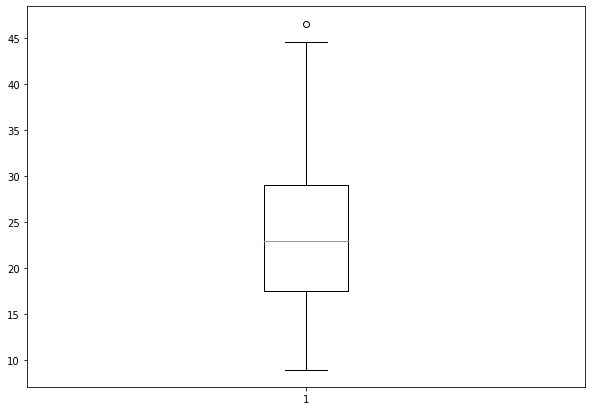

In [44]:
plt.figure(figsize=(10, 7))
plt.boxplot(auto_df['mpg'])
plt.show()

#### Histograms

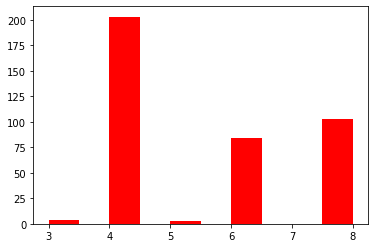

In [45]:
plt.figure()
plt.hist(auto_df['cylinders'], color='Red')
plt.show()

#### Scatter Plots

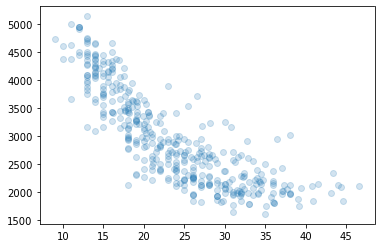

In [46]:
plt.figure()
plt.scatter(auto_df['mpg'], auto_df['weight'], alpha=0.2)
plt.show()

**Bar plots**

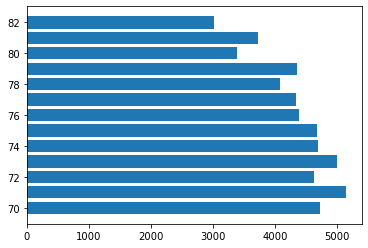

In [47]:
plt.figure()
plt.barh(auto_df['year'], auto_df['weight'])
plt.show()

#### Scatter Matrix

In [48]:
from pandas.plotting import scatter_matrix

<Figure size 432x288 with 0 Axes>

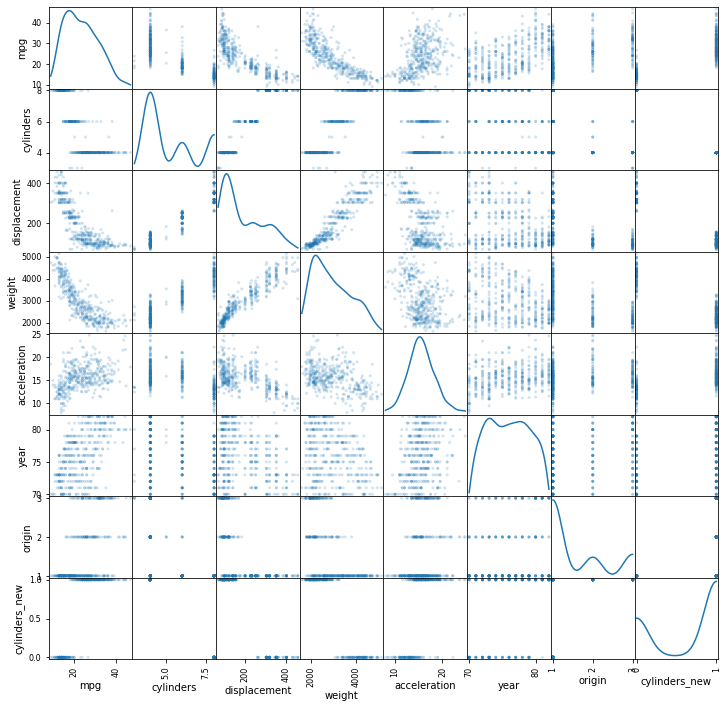

In [49]:
plt.figure()
scatter_matrix(auto_df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

#### 3d Plots

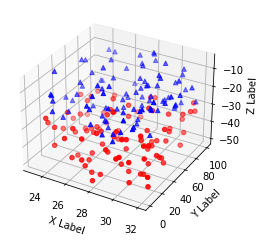

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

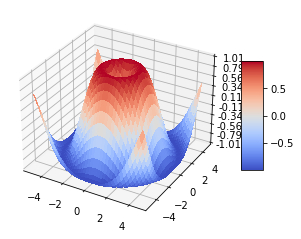

In [51]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


## 4. NumPy

NumPy is an open-source numerical Python library. It contains a multi-dimensional array and matrix data structures. It can be utilised to perform a number of mathematical operations on arrays such as trigonometric, statistical, and algebraic routines.

**Why use it?**

NumPy aims to provide an array object that is up to 50x faster than traditional Python lists!
The array object in NumPy is called *ndarray*, it provides a lot of supporting functions that make working with ndarray very easy.




In [52]:
import numpy as np

In [53]:
python_list = [1, 1, 2, 2, 4, 5, 6, 5, 1]
numpy_list = np.array([2,3,1,0])
numpy_list_from_python_list = np.array(python_list)
display(numpy_list)
numpy_list_from_python_list

array([2, 3, 1, 0])

array([1, 1, 2, 2, 4, 5, 6, 5, 1])

In [54]:
numpy_list.shape

(4,)

In [55]:
numpy_list.ndim

1

In [56]:
another_numpy_list = np.arange(20).reshape(4,5)
another_numpy_list

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [57]:
display(another_numpy_list.shape)
another_numpy_list.ndim

(4, 5)

2

**Vectorization**

In [58]:
li_a = np.array([1,2,3])
li_b = np.array([1,1,1])
for i in range(len(li_a)):
    print(li_a[i] * li_b[i])

1
2
3


In [59]:
# NumPy uses vectorization to optimize this. It essentially delegates the loop
# to pre-compiled, optimized C code under the hood
li_a * li_b

array([1, 2, 3])

In [60]:
li_a + li_b

array([2, 3, 4])

In [61]:
li_a / li_b

array([1., 2., 3.])

**Linear Algebra & Matrix Operations**

In [62]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
a

array([[1., 2.],
       [3., 4.]])

In [63]:
a.transpose()

array([[1., 3.],
       [2., 4.]])

In [64]:
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [65]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [66]:
A = np.random.rand(5,5)
print(A)

[[0.91613371 0.22682167 0.55959994 0.2961658  0.23207684]
 [0.98552847 0.40890129 0.96104533 0.05309871 0.1146445 ]
 [0.15326719 0.62505513 0.78647578 0.35693796 0.66424245]
 [0.08725065 0.30333066 0.98731403 0.67464167 0.17950723]
 [0.93337345 0.51030477 0.80192855 0.16567848 0.59173462]]


In [67]:
np.linalg.norm(A,'fro') #Frobenius norm

2.9561673142673754

In [68]:
B = np.random.rand(5,5)
B

array([[0.73008359, 0.80816352, 0.73747159, 0.65864685, 0.95708981],
       [0.88938403, 0.81960627, 0.18567164, 0.19451445, 0.44534019],
       [0.83354037, 0.9374271 , 0.96491903, 0.99858404, 0.65970627],
       [0.12774428, 0.16434688, 0.98272085, 0.54377451, 0.96632395],
       [0.11458826, 0.43947036, 0.43183806, 0.01390782, 0.13404875]])

In [69]:
print(np.matmul(A,B))# conventional matrix multiplication
print(A@B)# conventional matrix multiplication
print()
print(np.multiply(A,B))# element-wise
print(A*B)# element-wise


[[1.40146166 1.60153928 1.64897349 1.37061133 1.66430835]
 [1.90417848 2.09162563 1.83174063 1.71880514 1.82602558]
 [1.44508238 1.72400427 1.6255862  1.21122529 1.37785421]
 [1.26319484 1.43442279 1.81384536 1.47173509 1.54591442]
 [1.89270769 2.2115955  1.97523088 1.61313966 1.88903911]]
[[1.40146166 1.60153928 1.64897349 1.37061133 1.66430835]
 [1.90417848 2.09162563 1.83174063 1.71880514 1.82602558]
 [1.44508238 1.72400427 1.6255862  1.21122529 1.37785421]
 [1.26319484 1.43442279 1.81384536 1.47173509 1.54591442]
 [1.89270769 2.2115955  1.97523088 1.61313966 1.88903911]]

[[0.66885419 0.183309   0.41268906 0.19506867 0.22211838]
 [0.87651328 0.33513806 0.17843886 0.01032847 0.05105581]
 [0.12775439 0.58594362 0.75888545 0.35643255 0.43820491]
 [0.01114577 0.04985145 0.97025408 0.36685294 0.17346213]
 [0.10695364 0.22426382 0.34630327 0.00230423 0.07932129]]
[[0.66885419 0.183309   0.41268906 0.19506867 0.22211838]
 [0.87651328 0.33513806 0.17843886 0.01032847 0.05105581]
 [0.127754

**Other Useful Operations/Functions**

In [70]:
np.linspace(2.0, 3.0, num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [71]:
np.linspace(2.0, 3.0, num=10, endpoint=False)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

In [74]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
a = np.arange(10)
np.where(a < 5, a, 10*a)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

In [76]:
np.full((2, 2), 10)

array([[10, 10],
       [10, 10]])

In [77]:
np.concatenate((np.linspace(1.0, 2.0, num=5),np.linspace(3.0, 4.0, num=5)))

array([1.  , 1.25, 1.5 , 1.75, 2.  , 3.  , 3.25, 3.5 , 3.75, 4.  ])

For more references - https://numpy.org/devdocs/user/quickstart.html

## Some Excercise Questions

#### (Adapted from Introduction to Statistical Learning, James et al. (2013))


Using the 'Auto.csv' dataset that we utilized earlier, try to answer the below questions - 

a) Are there missing values? Show atleast two ways to check for null values in a dataframe.

In [79]:
auto_df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
year              0
origin            0
name              0
cylinders_new    91
dtype: int64

In [85]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            397 non-null    float64
 1   cylinders      397 non-null    int64  
 2   displacement   397 non-null    float64
 3   horsepower     397 non-null    object 
 4   weight         397 non-null    int64  
 5   acceleration   397 non-null    float64
 6   year           397 non-null    int64  
 7   origin         397 non-null    int64  
 8   name           397 non-null    object 
 9   cylinders_new  306 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 31.1+ KB


b) Which predictors are quantitative and which are qualitative?

Write you answer below - 

c) What is the *range* of **mpg** and **cylinders**?

In [92]:
auto_df[["mpg"]].apply(lambda x : x.max() - x.min())


mpg    37.6
dtype: float64

d) What is the mean and standard deviation of **weight** and **acceleration**?

e) Now remove the 10th through 85th observations, and for the remaining data report the min,max, mean, and standard deviation of **mpg**.

f) What is max weight per year?

**Some NumPy**

a) Initialize two random numpy matrices of 2x2 shape and stack them horizontally.

b) Initialize a 3x3 numpy matrix filled with 1's, and another 3x3 numpy matrix with 1's on the diagonal. Add both the matrices and replace all 1's with the value '4'.